<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Uexternado.jpg" width="240" height="240" align="right"/>

<center><h1>  Estadística Básica con Python.</header1></centre><br>

<left><h1>Sesión 4. DataFrames-EDA</header1></centre><br>

Andrés Martínez <br>
Mayo de 2024

1. preguntas y Temas pendientes anterior sesión
2. Atípicos y valores faltantes
3. EDA parte II


## EDA-II.


><figure><center>
  <img src="https://datos.gob.es/sites/default/files/u322/grafico.jpg" alt="EDA_FE" width=800 height=800/>
  <figcaption> EDA <a href="https://datos.gob.es/en/documentacion/practical-introductory-guide-exploratory-data-analysis">Source</a></figcaption>
</figure><center> 

## Preguntas y temas pendientes

+ ¿Cómo cambiar nombres columnas DataFrame?
+ ¿Cómo tratar la edad cuando está cerrada en años?
+ Crear un DataFrame aleatorio
+ Tablas de contingencia

In [31]:
#cargar Data
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/Andres1984/Data-Analysis-with-R/master/Bases/SavingData.csv'
df = pd.read_csv(url)
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37244 entries, 0 to 37243
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROMBEF_n      37244 non-null  object 
 1   PROMAFT_n      37244 non-null  float64
 2   TRATAMIENTO_N  37244 non-null  object 
 3   Af_inver       37244 non-null  object 
 4   asisten        37244 non-null  int64  
 5   EDAD           37244 non-null  int64  
 6   GENERO         37244 non-null  object 
 7   TIPOPOBLACION  37244 non-null  object 
 8   CATEGORIA1     37244 non-null  object 
 9   ZONAREG        37244 non-null  object 
 10  EDADCAT        37244 non-null  object 
 11  NUM_NUC        37244 non-null  object 
 12  Puntaje        37244 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 3.7+ MB


,PROMBEF_n,PROMAFT_n,TRATAMIENTO_N,Af_inver,asisten,EDAD,GENERO,TIPOPOBLACION,CATEGORIA1,ZONAREG,EDADCAT,NUM_NUC,Puntaje
37239,11410.753,10837.350769,CONTROL,AFECTADO,0,42,MASCULINO,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,217
37240,6554.84,2435.496154,INCENTIVO,AFECTADO,0,41,FEMENINO,SISBEN NIVEL1,BAJO,NORTE,"(33,45]",Hasta 4,215
37241,8109.679,3329.230769,CONTROL,AFECTADO,0,45,FEMENINO,SISBEN NIVEL1,BAJO,NORTE,"(33,45]",De 5 a 8,272
37242,2600,4337.773846,CONTROL,AFECTADO,0,78,FEMENINO,SISBEN NIVEL1,BAJO,NORTE,"(60,92]",De 5 a 8,261
37243,23138.71,8273.231538,CONTROL,AFECTADO,0,38,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,250


In [2]:
for col in ['Af_inver','GENERO', 'TIPOPOBLACION', 'CATEGORIA1', 'ZONAREG','EDADCAT','NUM_NUC', 'TRATAMIENTO_N']:
    df[col] = df[col].astype('category')
df['PROMBEF_n'] = pd.to_numeric(df['PROMBEF_n'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37244 entries, 0 to 37243
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PROMBEF_n      37203 non-null  float64 
 1   PROMAFT_n      37244 non-null  float64 
 2   TRATAMIENTO_N  37244 non-null  category
 3   Af_inver       37244 non-null  category
 4   asisten        37244 non-null  int64   
 5   EDAD           37244 non-null  int64   
 6   GENERO         37244 non-null  category
 7   TIPOPOBLACION  37244 non-null  category
 8   CATEGORIA1     37244 non-null  category
 9   ZONAREG        37244 non-null  category
 10  EDADCAT        37244 non-null  category
 11  NUM_NUC        37244 non-null  category
 12  Puntaje        37244 non-null  int64   
dtypes: category(8), float64(2), int64(3)
memory usage: 1.7 MB


### ¿Cómo cambiar nombres columnas DataFrame?

In [3]:
#1.¿Cómo cambiar nombres columnas DataFrame?
df = df.rename({'PROMBEF_n': 'PROMBEF', 'PROMAFT_n': 'PROMAFT'}, axis=1)#'nombre antiguo':'nombre nuevo'
df.head()

,PROMBEF,PROMAFT,TRATAMIENTO_N,Af_inver,asisten,EDAD,GENERO,TIPOPOBLACION,CATEGORIA1,ZONAREG,EDADCAT,NUM_NUC,Puntaje
0,7746.451,19281.887692,EDUCACION + INCENTIVO,NO AFECTADO,0,53,FEMENINO,DESPLAZADOS,MEDIO,NORTE,"(45,60]",De 5 a 8,457
1,24491.878,14491.783077,EDUCACION,AFECTADO,6,39,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,380
2,12189.591,15193.134615,EDUCACION + INCENTIVO,NO AFECTADO,0,60,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(45,60]",Hasta 4,408
3,14315.209,12982.394615,INCENTIVO,AFECTADO,0,32,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(25,33]",Hasta 4,244
4,51391.396,19692.766154,EDUCACION,AFECTADO,1,35,FEMENINO,SISBEN NIVEL1,MEDIO,CENTRO,"(33,45]",De 5 a 8,560


### ¿Cómo tratar la edad cuando está cerrada en años?

In [4]:
#2.¿Cómo tratar la edad cuando está cerrada en años?
#Tabla de frecuencias edad por intervalos
import warnings
warnings.filterwarnings('ignore')
import numpy as np
#bins=‘sqrt’ (https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html)
#Sturges: K = 1 + 3.3*Log(n)
bins=np.round(np.histogram_bin_edges(df['EDAD'], bins='sturges'), decimals=1)
#bins=10 
#df['EDAD_bins'] = pd.cut(x=df['EDAD'], bins=bins,include_lowest=False, precision=1)
df['EDAD_bins'] = pd.cut(x=df['EDAD'], bins=bins,include_lowest=True)
display(df.head())
df_edad=pd.DataFrame(df['EDAD_bins'].value_counts()).reset_index()
df_edad.columns = ['Edad_intervals', 'absoluta']
df_edad.sort_values(by=['Edad_intervals'],inplace=True)
df_edad['absoluta acum'] = df_edad['absoluta'].cumsum()


,PROMBEF,PROMAFT,TRATAMIENTO_N,Af_inver,asisten,EDAD,GENERO,TIPOPOBLACION,CATEGORIA1,ZONAREG,EDADCAT,NUM_NUC,Puntaje,EDAD_bins
0,7746.451,19281.887692,EDUCACION + INCENTIVO,NO AFECTADO,0,53,FEMENINO,DESPLAZADOS,MEDIO,NORTE,"(45,60]",De 5 a 8,457,"(52.8, 57.2]"
1,24491.878,14491.783077,EDUCACION,AFECTADO,6,39,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,380,"(35.4, 39.8]"
2,12189.591,15193.134615,EDUCACION + INCENTIVO,NO AFECTADO,0,60,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(45,60]",Hasta 4,408,"(57.2, 61.5]"
3,14315.209,12982.394615,INCENTIVO,AFECTADO,0,32,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(25,33]",Hasta 4,244,"(31.1, 35.4]"
4,51391.396,19692.766154,EDUCACION,AFECTADO,1,35,FEMENINO,SISBEN NIVEL1,MEDIO,CENTRO,"(33,45]",De 5 a 8,560,"(31.1, 35.4]"


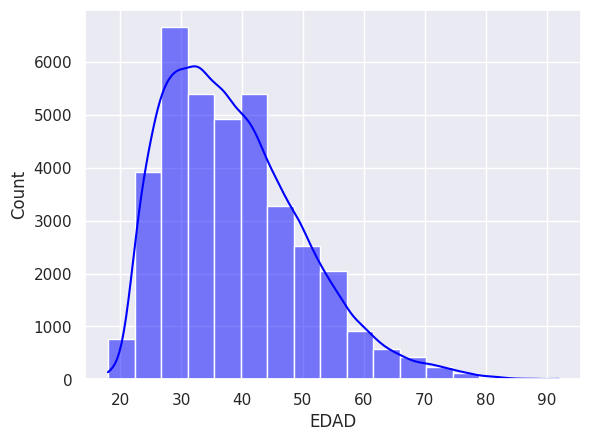

In [5]:
#Histograma
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

sns.histplot(data=df, x="EDAD", kde=True, color="blue", bins=bins)

plt.show()

In [6]:
df['Edad_d'] = pd.cut(x=df['EDAD'], bins=[17.9, 25, 35, 50, 60, 100],
                    labels=['18 to 25','26 to 35','36 to 50','51 to 60','60 to 100'])
labels=['18 to 25','26 to 35','36 to 50','51 to 60','60 to 100']
df['Edad_d'] = pd.Categorical(df['Edad_d'], categories =labels, ordered = True)
df.head()

,PROMBEF,PROMAFT,TRATAMIENTO_N,Af_inver,asisten,EDAD,GENERO,TIPOPOBLACION,CATEGORIA1,ZONAREG,EDADCAT,NUM_NUC,Puntaje,EDAD_bins,Edad_d
0,7746.451,19281.887692,EDUCACION + INCENTIVO,NO AFECTADO,0,53,FEMENINO,DESPLAZADOS,MEDIO,NORTE,"(45,60]",De 5 a 8,457,"(52.8, 57.2]",51 to 60
1,24491.878,14491.783077,EDUCACION,AFECTADO,6,39,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,380,"(35.4, 39.8]",36 to 50
2,12189.591,15193.134615,EDUCACION + INCENTIVO,NO AFECTADO,0,60,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(45,60]",Hasta 4,408,"(57.2, 61.5]",51 to 60
3,14315.209,12982.394615,INCENTIVO,AFECTADO,0,32,FEMENINO,SISBEN NIVEL1,MEDIO,NORTE,"(25,33]",Hasta 4,244,"(31.1, 35.4]",26 to 35
4,51391.396,19692.766154,EDUCACION,AFECTADO,1,35,FEMENINO,SISBEN NIVEL1,MEDIO,CENTRO,"(33,45]",De 5 a 8,560,"(31.1, 35.4]",26 to 35


In [7]:
#descriptivo edad
df_trata=pd.crosstab(index=df['Edad_d'], columns='count')
df_trata['Frec relativa']=df_trata/df_trata.sum()
df_trata.reset_index(inplace=True)#index como columna


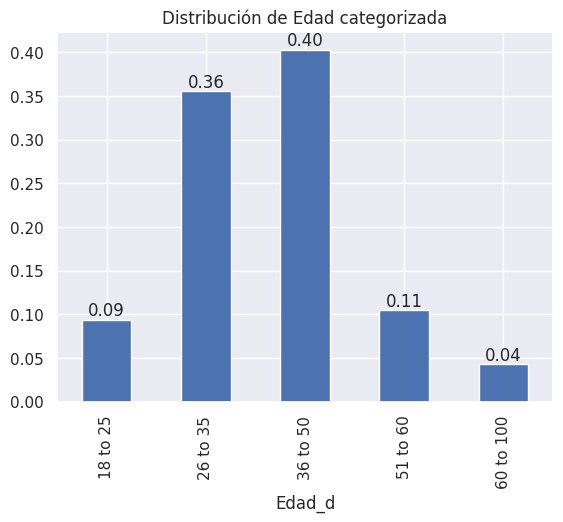

In [8]:
### barplot EDAD
fig, ax = plt.subplots()
ax=df["Edad_d"].value_counts(normalize=True).reindex(labels).plot.bar()
ax.bar_label(ax.containers[0],fmt='%.2f')
plt.title('Distribución de Edad categorizada');

###  Tablas de contingencia

In [9]:
#Frecuencias absolutas
pd.crosstab(df.TRATAMIENTO_N, df.GENERO)

GENERO,FEMENINO,MASCULINO
TRATAMIENTO_N,,
CONTROL,8600,970
EDUCACION,8545,829
EDUCACION + INCENTIVO,7352,1042
INCENTIVO,9088,818


In [10]:
#Frecuencias absolutas con totales
pd.crosstab(df.TRATAMIENTO_N, df.GENERO, margins=True, margins_name="Total")

GENERO,FEMENINO,MASCULINO,Total
TRATAMIENTO_N,,,
CONTROL,8600,970,9570
EDUCACION,8545,829,9374
EDUCACION + INCENTIVO,7352,1042,8394
INCENTIVO,9088,818,9906
Total,33585,3659,37244


In [11]:
#Frecuencias relativa al total de datos
pd.crosstab(df.TRATAMIENTO_N, df.GENERO, margins=True, margins_name="Total", normalize=True)

GENERO,FEMENINO,MASCULINO,Total
TRATAMIENTO_N,,,
CONTROL,0.230910,0.026044,0.256954
EDUCACION,0.229433,0.022259,0.251692
EDUCACION + INCENTIVO,0.197401,0.027978,0.225379
INCENTIVO,0.244012,0.021963,0.265976
Total,0.901756,0.098244,1.000000


In [12]:
#Frecuencias realtiva al total de la columna
pd.crosstab(df.TRATAMIENTO_N, df.GENERO, margins=True, margins_name="Total", normalize='columns')

GENERO,FEMENINO,MASCULINO,Total
TRATAMIENTO_N,,,
CONTROL,0.256067,0.265100,0.256954
EDUCACION,0.254429,0.226565,0.251692
EDUCACION + INCENTIVO,0.218907,0.284777,0.225379
INCENTIVO,0.270597,0.223558,0.265976


In [13]:
#Frecuencias realtiva al total de la fila
pd.crosstab(df.TRATAMIENTO_N, df.GENERO, margins=True, margins_name="Total", normalize='index').round(3)*100

GENERO,FEMENINO,MASCULINO
TRATAMIENTO_N,,
CONTROL,89.9,10.1
EDUCACION,91.2,8.8
EDUCACION + INCENTIVO,87.6,12.4
INCENTIVO,91.7,8.3
Total,90.2,9.8


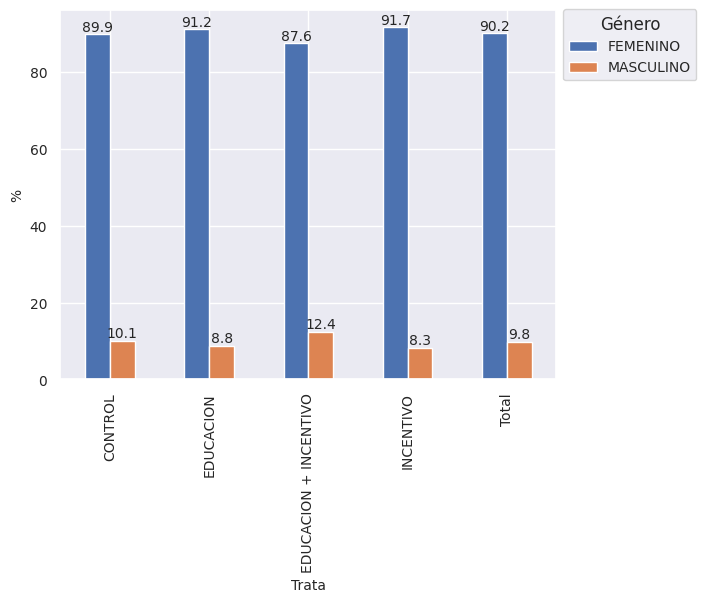

In [14]:
crosstb=pd.crosstab(df.TRATAMIENTO_N, df.GENERO, margins=True, margins_name="Total", normalize='index').round(3)*100
ax = crosstb.plot(kind='bar', stacked=False, rot=0)
ax.legend(title='Género', bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=10)
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, label_type='edge',fontsize=10)#'center'
ax.tick_params(axis='x',labelsize=10,rotation=90)
ax.tick_params(axis='y',labelsize=10,rotation=0)
ax.set_xlabel('Trata', fontsize = 10)
ax.set_ylabel('%', fontsize = 10);

In [15]:
#más de crosstab (https://pbpython.com/pandas-crosstab.html)

### Creación aleatoria de conjuntos de datos

In [16]:
import numpy as np
import pandas as pd 
np.random.seed(1) 
n=10
int_age=np.random.randint(20,25,size=n)
int_yearsofexp=np.random.randint(0, 5, size=n)
float_grade=np.random.uniform(3, 5, size=n)
float_revenue=np.random.normal(25, 3, size=n)
cat_origin=np.random.choice(['Colombia','Venezuela','Otro'], size=n,p=[0.6,0.3,0.1])
df_r = pd.DataFrame({'age':int_age, 'revenue':float_revenue, 'yearsofexp':int_yearsofexp,'origin':cat_origin,'grade':float_grade})   
df_r['origin']=df_r['origin'].astype('category')
df_r

,age,revenue,yearsofexp,origin,grade
0,23,26.129970,1,Colombia,4.827924
1,24,26.128405,2,Venezuela,3.914410
2,20,24.507428,4,Colombia,3.861397
3,21,24.746370,2,Colombia,4.878256
4,23,27.794674,4,Venezuela,4.556778
5,20,30.120805,3,Venezuela,4.431941
6,20,22.324259,4,Colombia,4.605515
7,21,30.206790,2,Colombia,3.185602
8,24,23.106675,4,Colombia,4.036305
9,24,22.277970,2,Colombia,4.730041


### Tratar valores Null

In [17]:
df['GENERO'][1] = np.nan
#identificar
df.isnull().sum()

PROMBEF          41
PROMAFT           0
TRATAMIENTO_N     0
Af_inver          0
asisten           0
EDAD              0
GENERO            1
TIPOPOBLACION     0
CATEGORIA1        0
ZONAREG           0
EDADCAT           0
NUM_NUC           0
Puntaje           0
EDAD_bins         0
Edad_d            0
dtype: int64

In [18]:
# eliminar nans asociados a una variable
df_del=df.dropna(subset=['PROMBEF'])
#df_del=df.dropna()# eliminar nans de todo el conjunto
print(df.shape)
print(df_del.shape)

(37244, 15)
(37203, 15)


In [19]:
# Tratamiento: Imputar con la media o mediana
import numpy as np
from sklearn.impute import SimpleImputer

im_mean=SimpleImputer(missing_values=np.nan, strategy='mean')#'median'
im_mean=im_mean.fit(df[['PROMBEF']])
df['PROMBEF_miu'] = im_mean.transform(df[['PROMBEF']])
pd.DataFrame(df).isnull().sum() 

PROMBEF          41
PROMAFT           0
TRATAMIENTO_N     0
Af_inver          0
asisten           0
EDAD              0
GENERO            1
TIPOPOBLACION     0
CATEGORIA1        0
ZONAREG           0
EDADCAT           0
NUM_NUC           0
Puntaje           0
EDAD_bins         0
Edad_d            0
PROMBEF_miu       0
dtype: int64

Otros imputadores: K-NN (K Nearest Neighbours), MICE (Multivariate Imputation by Chained Equations)-Linear Regression,Expectation-Maximization (EM), ...

https://scikit-learn.org/stable/modules/impute.html

## Estadística descriptiva

###  descriptivos básicos


In [20]:
df_new=df.drop(['PROMBEF', 'GENERO'],axis=1)
df_new.describe().applymap('{:,.2f}'.format)

,PROMAFT,asisten,EDAD,Puntaje,PROMBEF_miu
count,"37,244.00","37,244.00","37,244.00","37,244.00","37,244.00"
mean,"20,651.17",1.44,38.66,359.24,"14,577.51"
std,"29,273.54",2.13,11.15,96.90,"16,049.82"
min,0.00,0.00,18.00,99.00,0.00
25%,"8,159.04",0.00,30.00,273.00,"5,952.58"
50%,"13,528.24",0.00,37.00,377.00,"11,085.59"
75%,"22,553.06",3.00,45.00,426.00,"18,053.96"
max,"673,704.19",6.00,92.00,622.00,"324,797.71"


In [21]:
#Coeficiente de Variación
import numpy as np
cv = lambda x: np.std(x) / np.mean(x) * 100 
df_new[['PROMAFT','PROMBEF_miu','asisten','EDAD','Puntaje']].apply(cv)

PROMAFT        141.750570
PROMBEF_miu    110.098375
asisten        148.139722
EDAD            28.837673
Puntaje         26.972187
dtype: float64

In [22]:
#RI
ri = lambda x: np.percentile(x,75)-np.percentile(x,25)  
df_new[['PROMAFT','PROMBEF_miu','asisten','EDAD','Puntaje']].apply(ri)

PROMAFT        14394.022115
PROMBEF_miu    12101.375000
asisten            3.000000
EDAD              15.000000
Puntaje          153.000000
dtype: float64

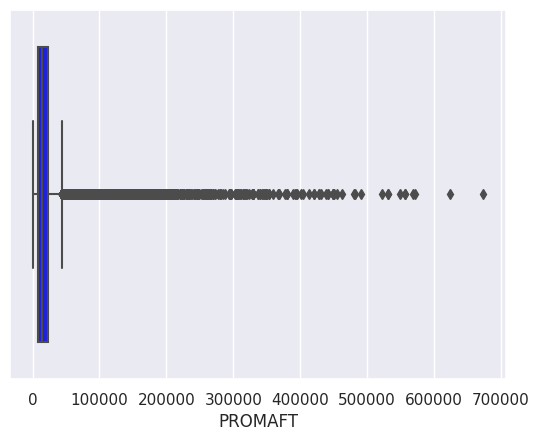

In [23]:
#Box-plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

sns.boxplot(data=df_new, x="PROMAFT", color="blue")#x horizontal, y vertical
#df.T.boxplot(vert=False)



plt.show()

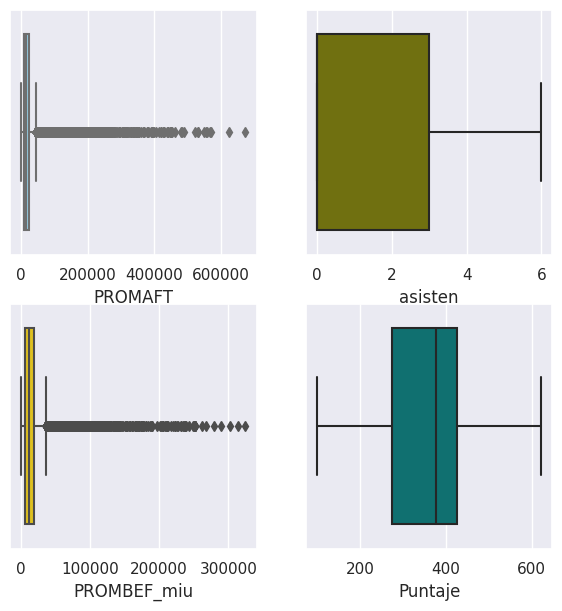

In [24]:
#Box-plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")


fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(data=df, x="PROMAFT", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="asisten", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="PROMBEF_miu", color="gold", ax=axs[1, 0])
sns.boxplot(data=df, x="Puntaje", color="teal", ax=axs[1, 1])

plt.show()

In [25]:
#trim
print(df_new.describe())

import pandas as pd
from scipy import stats
df_newc=df_new.copy()
for col in df_newc[['PROMAFT','PROMBEF_miu','asisten','EDAD','Puntaje']].columns: 
     df_newc[col] = stats.mstats.trim(df_newc[col], limits=(None,0.01), relative=True)
print(df_newc.describe())      

             PROMAFT       asisten          EDAD       Puntaje    PROMBEF_miu
count   37244.000000  37244.000000  37244.000000  37244.000000   37244.000000
mean    20651.168660      1.436715     38.658791    359.238777   14577.510159
std     29273.542326      2.128374     11.148445     96.895857   16049.817305
min         0.000000      0.000000     18.000000     99.000000       0.000000
25%      8159.040577      0.000000     30.000000    273.000000    5952.581000
50%     13528.235000      0.000000     37.000000    377.000000   11085.590500
75%     22553.062692      3.000000     45.000000    426.000000   18053.956000
max    673704.188462      6.000000     92.000000    622.000000  324797.711000
             PROMAFT       asisten          EDAD       Puntaje   PROMBEF_miu
count   36872.000000  36872.000000  36872.000000  36872.000000  36872.000000
mean    18497.197770      1.390676     38.284199    357.040736  13495.865448
std     17412.502226      2.088891     10.551088     94.857580  108

In [26]:
#remover outliers al usar Z y IQR.
# with IQR, z y percentiles

def remove_outlier_IQR(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower  = q1-1.5*iqr
    upper = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > lower) & (df_in[col_name] < upper)]
    return df_out

def remove_outlier_z(df_in,colname,standard_deviations):
    df_out =df_in[((df_in[colname] - df_in[colname].mean()) / df_in[colname].std()).abs() < standard_deviations]
    return df_out

def remove_outlier_perc(df_in, col_name, q):
    upper = df_in[col_name].quantile(1-q)
    lower = df_in[col_name].quantile(q)
    df_out = df_in.loc[(df_in[col_name] > lower) & (df_in[col_name] < upper)]
    return df_out

a=remove_outlier_IQR(df_new, 'EDAD').shape
b=remove_outlier_z(df_new,'EDAD',3).shape
c=remove_outlier_perc(df_new, 'EDAD', 0.05).shape
print(a,b,c)

(36605, 14) (36948, 14) (32675, 14)


### Descriptivos para dos variables

<Axes: xlabel='PROMBEF_miu', ylabel='PROMAFT'>

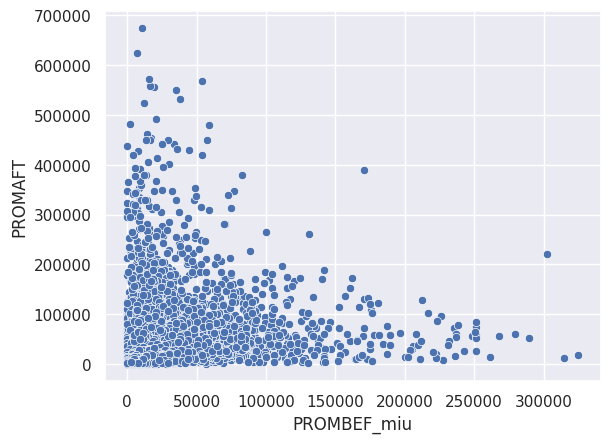

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
sns.scatterplot(data=df_new, x='PROMBEF_miu', y='PROMAFT')

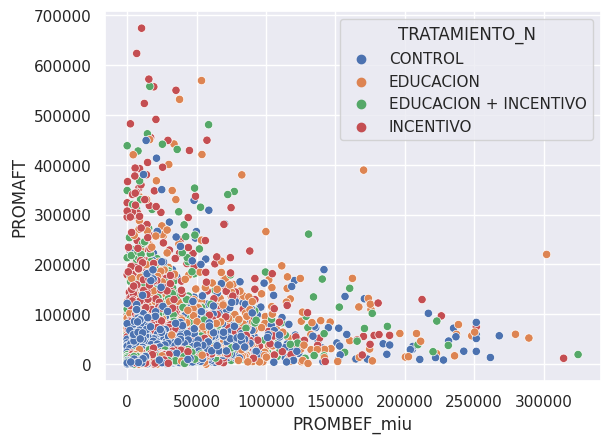

In [28]:
#Por tratamiento
import seaborn as sns
sns.scatterplot(data=df_new, x='PROMBEF_miu', y='PROMAFT', hue='TRATAMIENTO_N');

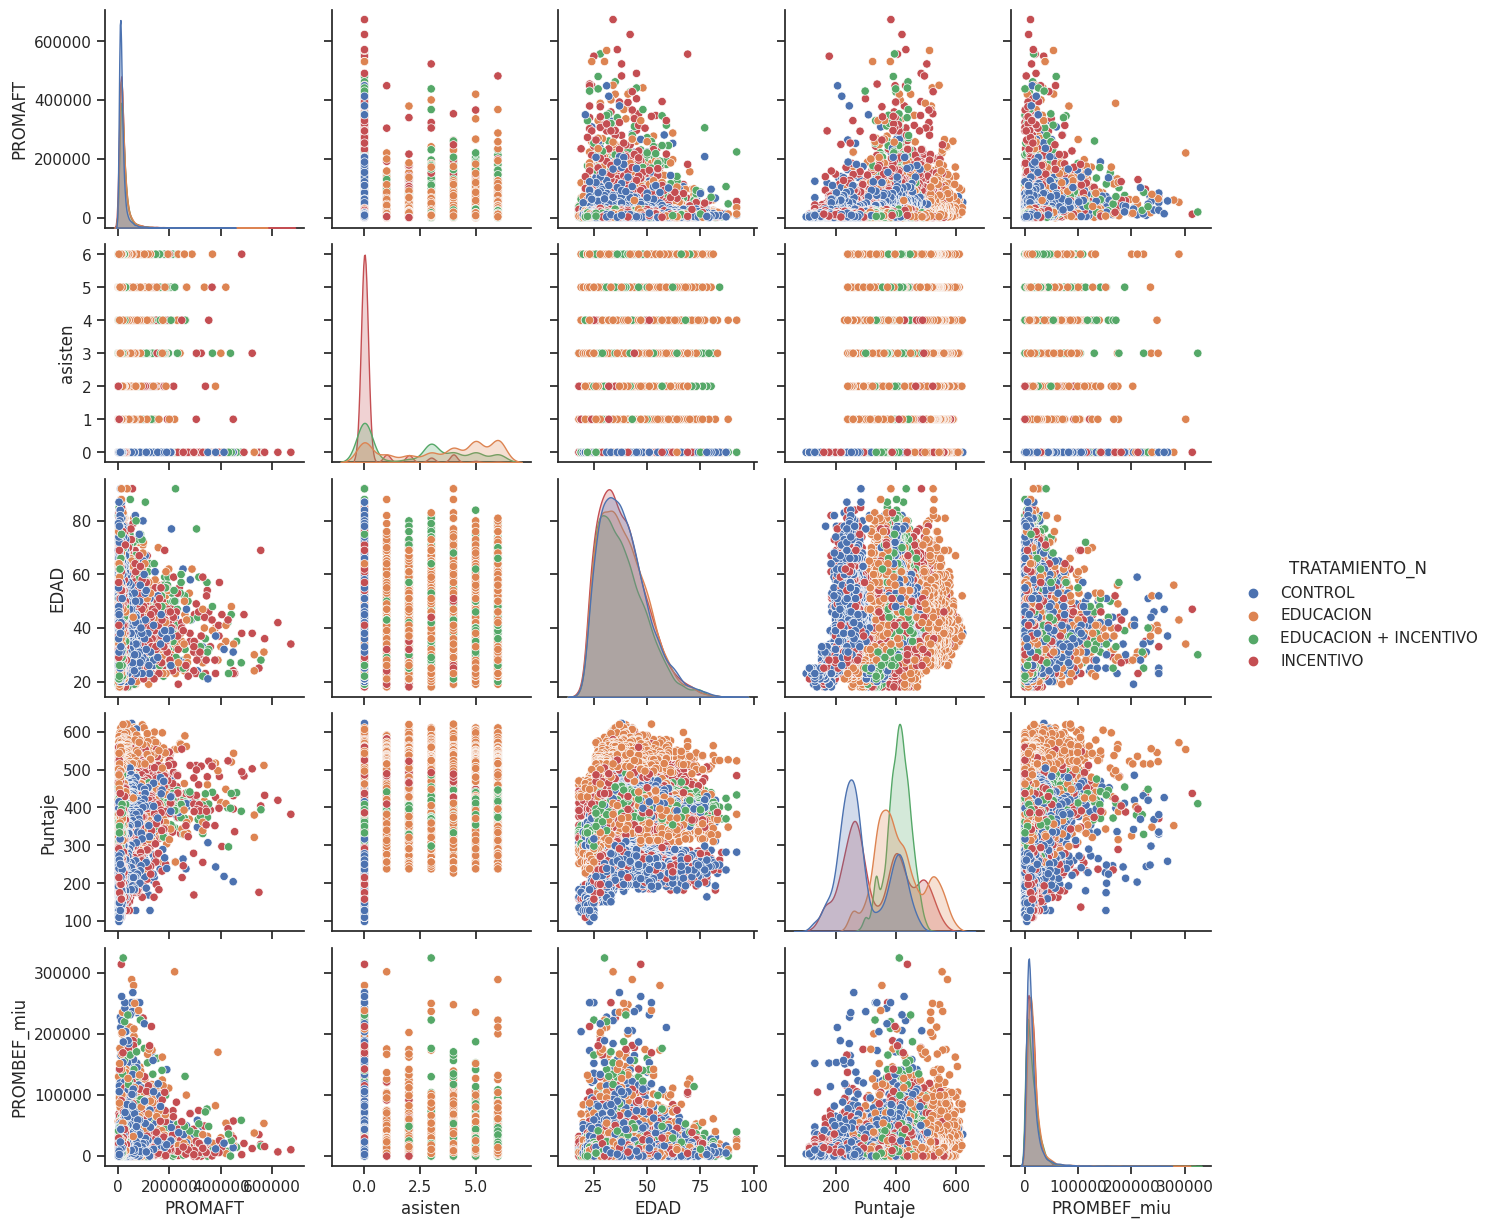

In [29]:
#matriz de gráficos de dispersión
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_new, hue="TRATAMIENTO_N")

In [30]:
#Correlation
import pandas as pd
from scipy.stats import pearsonr
corr= pearsonr(df_new['PROMAFT'], df_new['PROMBEF_miu'])[0]
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.295


In [93]:
#Correlation
import pandas as pd
from scipy.stats import spearmanr
corr= spearmanr(df_new['PROMAFT'], df_new['PROMBEF_miu'])[0]
print('Spearman correlation: %.3f' % corr)

Spearman correlation: 0.526


In [94]:
#Correlation
import pandas as pd
from scipy.stats import kendalltau
corr= kendalltau(df_new['PROMAFT'], df_new['PROMBEF_miu'])[0]
print('Kendall correlation: %.3f' % corr)

Kendall correlation: 0.375


In [97]:
df_new

,PROMAFT,TRATAMIENTO_N,Af_inver,asisten,EDAD,TIPOPOBLACION,CATEGORIA1,ZONAREG,EDADCAT,NUM_NUC,Puntaje,EDAD_bins,Edad_d,PROMBEF_miu
0,19281.887692,EDUCACION + INCENTIVO,NO AFECTADO,0,53,DESPLAZADOS,MEDIO,NORTE,"(45,60]",De 5 a 8,457,"(52.8, 57.2]",51 to 60,7746.451
1,14491.783077,EDUCACION,AFECTADO,6,39,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,380,"(35.4, 39.8]",36 to 50,24491.878
2,15193.134615,EDUCACION + INCENTIVO,NO AFECTADO,0,60,SISBEN NIVEL1,MEDIO,NORTE,"(45,60]",Hasta 4,408,"(57.2, 61.5]",51 to 60,12189.591
3,12982.394615,INCENTIVO,AFECTADO,0,32,SISBEN NIVEL1,MEDIO,NORTE,"(25,33]",Hasta 4,244,"(31.1, 35.4]",26 to 35,14315.209
4,19692.766154,EDUCACION,AFECTADO,1,35,SISBEN NIVEL1,MEDIO,CENTRO,"(33,45]",De 5 a 8,560,"(31.1, 35.4]",26 to 35,51391.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37239,10837.350769,CONTROL,AFECTADO,0,42,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,217,"(39.8, 44.1]",36 to 50,11410.753
37240,2435.496154,INCENTIVO,AFECTADO,0,41,SISBEN NIVEL1,BAJO,NORTE,"(33,45]",Hasta 4,215,"(39.8, 44.1]",36 to 50,6554.840
37241,3329.230769,CONTROL,AFECTADO,0,45,SISBEN NIVEL1,BAJO,NORTE,"(33,45]",De 5 a 8,272,"(44.1, 48.5]",36 to 50,8109.679
37242,4337.773846,CONTROL,AFECTADO,0,78,SISBEN NIVEL1,BAJO,NORTE,"(60,92]",De 5 a 8,261,"(74.6, 78.9]",60 to 100,2600.000


In [96]:
#matriz de covarianzas
cov_mat = df_new.cov()
cov_mat

ValueError: could not convert string to float: 'EDUCACION + INCENTIVO'

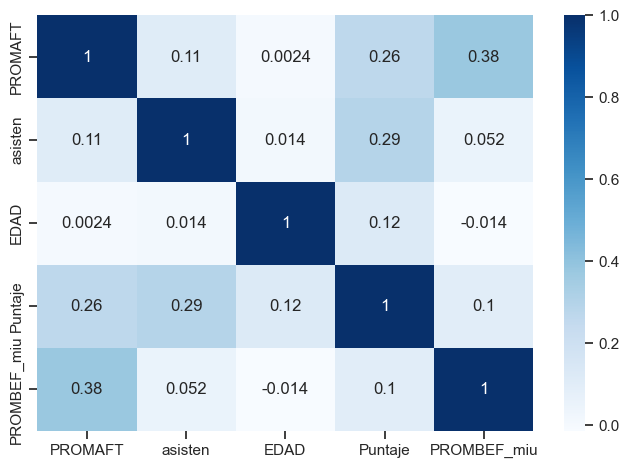

In [78]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_mat, annot=True,cmap="Blues")
plt.show()

In [79]:
#lin regression
from scipy import stats
slope, intercept,r_value,p_value,std_err=stats.linregress(df_new['PROMBEF_miu'],df_new['PROMAFT'])
print('Pendiente: %.3f' % slope)
print('Intercepto: %.3f' % intercept)
print('Correlation: %.3f' % r_value)
print('r-squared: %.3f' % r_value**2)

Pendiente: 0.538
Intercepto: 12801.397
Correlation: 0.295
r-squared: 0.087


## Algunas transformaciones 

In [83]:
#!pip install category_encoders
import category_encoders as ce
import pandas as pd

encoder=ce.OneHotEncoder(cols=['GENERO_mod'],handle_unknown='return_nan',
                         return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df_new)

# class variable ordinal
encoder_ord=ce.OrdinalEncoder(cols=['Edad_d'],return_df=True)
df_encoded = encoder_ord.fit_transform(df_encoded)
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37244 entries, 0 to 37243
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PROMAFT               37244 non-null  float64 
 1   TRATAMIENTO_N         37244 non-null  category
 2   Af_inver              37244 non-null  category
 3   asisten               37244 non-null  int64   
 4   EDAD                  37244 non-null  int64   
 5   TIPOPOBLACION         37244 non-null  category
 6   CATEGORIA1            37244 non-null  category
 7   ZONAREG               37244 non-null  category
 8   EDADCAT               37244 non-null  category
 9   NUM_NUC               37244 non-null  category
 10  Puntaje               37244 non-null  int64   
 11  EDAD_bins             37244 non-null  category
 12  Edad_d                37244 non-null  int32   
 13  PROMBEF_miu           37244 non-null  float64 
 14  GENERO_mod_FEMENINO   37244 non-null  float64 
 15  GE

,PROMAFT,TRATAMIENTO_N,Af_inver,asisten,EDAD,TIPOPOBLACION,CATEGORIA1,ZONAREG,EDADCAT,NUM_NUC,Puntaje,EDAD_bins,Edad_d,PROMBEF_miu,GENERO_mod_FEMENINO,GENERO_mod_MASCULINO
0,19281.887692,EDUCACION + INCENTIVO,NO AFECTADO,0,53,DESPLAZADOS,MEDIO,NORTE,"(45,60]",De 5 a 8,457,"(52.8, 57.2]",4,7746.451,1.0,0.0
1,14491.783077,EDUCACION,AFECTADO,6,39,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,380,"(35.4, 39.8]",3,24491.878,1.0,0.0
2,15193.134615,EDUCACION + INCENTIVO,NO AFECTADO,0,60,SISBEN NIVEL1,MEDIO,NORTE,"(45,60]",Hasta 4,408,"(57.2, 61.5]",4,12189.591,1.0,0.0
3,12982.394615,INCENTIVO,AFECTADO,0,32,SISBEN NIVEL1,MEDIO,NORTE,"(25,33]",Hasta 4,244,"(31.1, 35.4]",2,14315.209,1.0,0.0
4,19692.766154,EDUCACION,AFECTADO,1,35,SISBEN NIVEL1,MEDIO,CENTRO,"(33,45]",De 5 a 8,560,"(31.1, 35.4]",2,51391.396,1.0,0.0


In [84]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
df_encoded[['PROMAFT_sd']] = StandardScaler().fit_transform(df_encoded[['PROMAFT']])
df_encoded.head()

,PROMAFT,TRATAMIENTO_N,Af_inver,asisten,EDAD,TIPOPOBLACION,CATEGORIA1,ZONAREG,EDADCAT,NUM_NUC,Puntaje,EDAD_bins,Edad_d,PROMBEF_miu,GENERO_mod_FEMENINO,GENERO_mod_MASCULINO,PROMAFT_sd
0,19281.887692,EDUCACION + INCENTIVO,NO AFECTADO,0,53,DESPLAZADOS,MEDIO,NORTE,"(45,60]",De 5 a 8,457,"(52.8, 57.2]",4,7746.451,1.0,0.0,-0.046776
1,14491.783077,EDUCACION,AFECTADO,6,39,SISBEN NIVEL1,MEDIO,NORTE,"(33,45]",Hasta 4,380,"(35.4, 39.8]",3,24491.878,1.0,0.0,-0.210411
2,15193.134615,EDUCACION + INCENTIVO,NO AFECTADO,0,60,SISBEN NIVEL1,MEDIO,NORTE,"(45,60]",Hasta 4,408,"(57.2, 61.5]",4,12189.591,1.0,0.0,-0.186452
3,12982.394615,INCENTIVO,AFECTADO,0,32,SISBEN NIVEL1,MEDIO,NORTE,"(25,33]",Hasta 4,244,"(31.1, 35.4]",2,14315.209,1.0,0.0,-0.261973
4,19692.766154,EDUCACION,AFECTADO,1,35,SISBEN NIVEL1,MEDIO,CENTRO,"(33,45]",De 5 a 8,560,"(31.1, 35.4]",2,51391.396,1.0,0.0,-0.032740


## EDA Automático

In [ ]:
# Limitación en número de datos
# !pip install pandas-profiling
from pandas_profiling import ProfileReport
desc=ProfileReport(df_new, explorative=True)
desc.to_file('Report_profiling.html')

In [85]:
# Desventaja: pocos datos y solución: sample
from pandas_profiling import ProfileReport
#Usar una muestra
desc1 = ProfileReport(df_new.sample(n=500), explorative=True) 
desc1.to_file(output_file='Report_profiling1.html')
#https://arxiv.org/pdf/1811.11440.pdf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#!pip install dataprep
#from dataprep.datasets import load_dataset
from dataprep.eda import create_report

from dataprep.eda import create_report
create_report(df_new)

In [ ]:
#AutoViz can be implemented in 4 simple steps:
#!pip install autoviz
#!pip install xlrd
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
dftc = AV.AutoViz(filename='', sep ='' , depVar ='PROMAFT', dfte = df_new, header = 0,
verbose = 1, lowess = False, chart_format ='png', max_rows_analyzed = 15000, max_cols_analyzed = 30)
#dftc.to_file('Report_autoviz.html') 

In [ ]:
#!pip install dtale
import dtale
dtale.show(df_new)

In [ ]:
import pandas as pd
#!pip install sweetviz
import sweetviz
my_report = sweetviz.analyze([df_new, "FE"],target_feat='PROMAFT')
my_report.show_html('ReportSweetviz.html')